In [1]:
#Import Libraries and tools

import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters

%matplotlib inline 

### Defining style for plots

In [3]:
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None

In [4]:
set_sns_format(width=14, height=8)

### Change Date Time format function

In [13]:
date_format= 0
x = 0
def change_date_time(n, date_format=date_format):
    x = pd.to_datetime(n, unit='ms')
    #input = column with date
    #output = pandas date time with format day/month/year/week hour/minute/second
    print('1- for d/m/y h:m:s\n')
    print('2- for d/m/y\n')
    print('3- for day_name\n')
    print('4- for hour on 24h \n')
    print('5 for month on number 2 - 3 \n')
    date_format = int(input('Pleae choose 1 - 2 - 3 - 4 - 5\n'))
    flag = True
    while flag == True:
        if date_format == 1:
            if (n.dtype == 'int64') or (n.dtype == 'float64'):
                x = pd.to_datetime(n, unit='ms')
                return x.dt.strftime('%d/%m/%y %H:%M:%S')
                flag = False
            else:
                return x.dt.strftime('%d/%m/%y %H:%M:%S')
                flag = False
        elif date_format == 2:
            if (n.dtype == 'int64') or (n.dtype == 'float64'):
                x = pd.to_datetime(n, unit='ms')
                return x.dt.strftime('%d/%m/%y')
                flag = False
            else:
                return x.dt.strftime('%d/%m/%y')
                flag = False
        elif date_format == 3: 
            if (n.dtype == 'int64') or (n.dtype == 'float64'):
                x = pd.to_datetime(n, unit='ms')
                return x.dt.strftime('%A')
                flag = False
            else:
                return x.dt.strftime('%A')
                flag = False
        elif date_format == 4: 
            if (n.dtype == 'int64') or (n.dtype == 'float64'):
                x = pd.to_datetime(n, unit='ms')
                return x.dt.strftime('%H')
                flag = False
            else:
                return x.dt.strftime('%H')
                flag = False
        elif date_format == 5: 
            if (n.dtype == 'int64') or (n.dtype == 'float64'):
                x = pd.to_datetime(n, unit='ms')
                return x.dt.strftime('%m')
                flag = False
            else:
                return x.dt.strftime('%m')
                flag = False
        else:
            print('1- for d/m/y h:m:s\n')
            print('2- for d/m/y\n')
            print('3- for day_name\n')
            print('4- for hour on 24h \n')
            print('5 for month on number 2 - 3 \n')
            date_format = int(input('Pleae choose 1 - 2 - 3 - 4 - 5 \n'))

### Read Parquet Files

In [5]:
df1 = pd.read_parquet(r'D:\\Repositories\\Analysis Project Outpush/interaction_data_sagid.parquet.gzip', engine='fastparquet')

In [9]:
df2 = pd.read_parquet(r'D:\\Repositories\\Analysis Project Outpush\\Data/master_df.gzip', engine='fastparquet')

### Merge Two Tables

In [11]:
inner = df1.merge(df2, how='inner', on='pushMessageId')

# Pivot Table with index 'Day' and count of pushs, received, closed, and opened 

In [16]:
pv = inner.pivot_table(index=pd.to_datetime(inner['sentTs_x'], unit='ms').dt.strftime('%d/%m/%y'), aggfunc='sum')[['closed','opened', 'received', 'sent']]

In [31]:
#Ordering the pv dataframe 
pv = pv.reset_index()
pv['month']=pd.to_datetime(pv['sentTs_x'], format='%d/%m/%y').dt.strftime('%m')
pv.sort_values(by=['month', 'sentTs_x'], inplace=True)
pv.set_index('sentTs_x', inplace=True)
pv = pv.astype('int64')
pv.index.names = ['date']
pv.drop(['level_0', 'index', 'month'], axis=1, inplace=True)

### Plot notifications per day

In [37]:
#Create a average line for all notifications
mean = []
for i in range(len(pv)):
    mean.append(pv['sent'].mean().round())
    i += 1


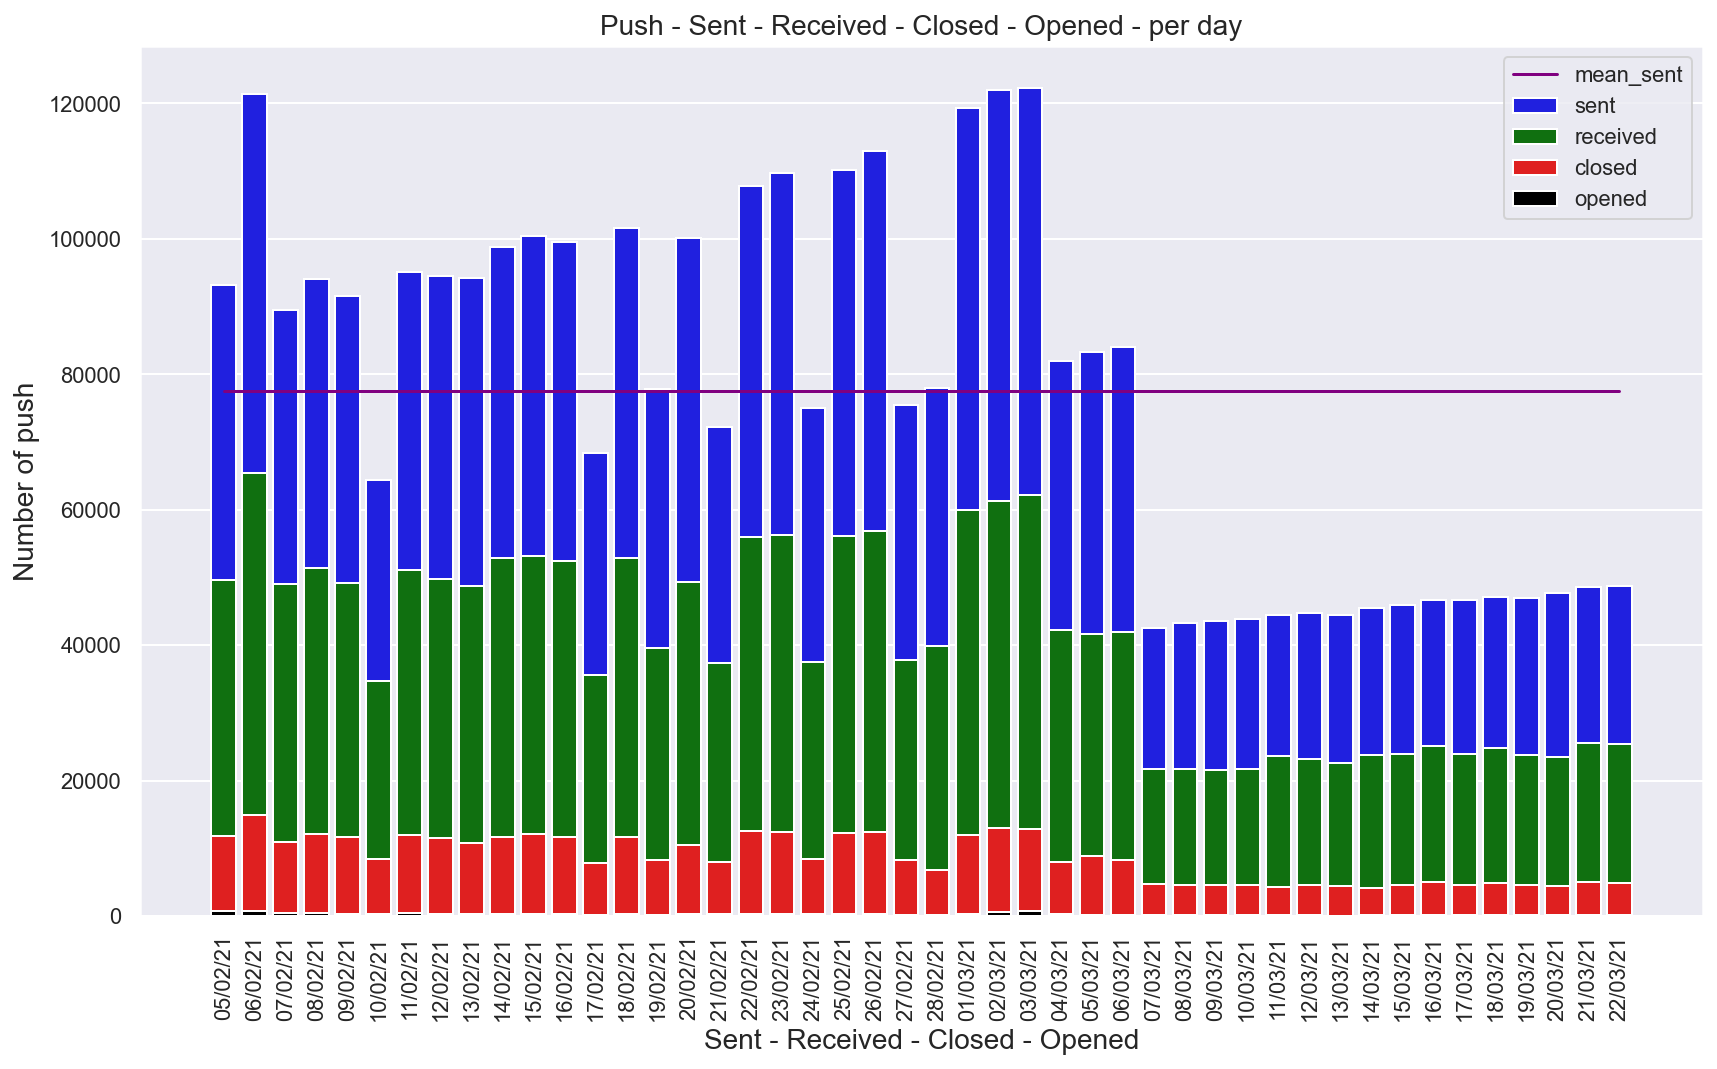

In [38]:
#Visualize the number of push, received, closed, and opened per day.
ax1 = sns.barplot(x=pv.index, y="sent", data=pv, label="sent", color='blue')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)
ax2 = sns.barplot(x=pv.index, y="received", data=pv, label="received", color='green')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)
ax3= sns.barplot(x=pv.index, y="closed", data=pv, label="closed", color='red')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels)
ax4 = sns.barplot(x=pv.index, y="opened", data=pv, label="opened", color='black')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels)
ax5 = sns.lineplot(data=mean, color='purple', label='mean_sent')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels)
plt.title('Push - Sent - Received - Closed - Opened - per day', fontsize=14)
plt.xticks(rotation='vertical')
plt.xlabel('Sent - Received - Closed - Opened', fontsize=14)
plt.ylabel('Number of push', fontsize=14)
plt.show()

In [39]:
#Create a average line for Ads opened
mean = []
for i in range(len(pv)):
    mean.append(pv['opened'].mean().round())
    i += 1

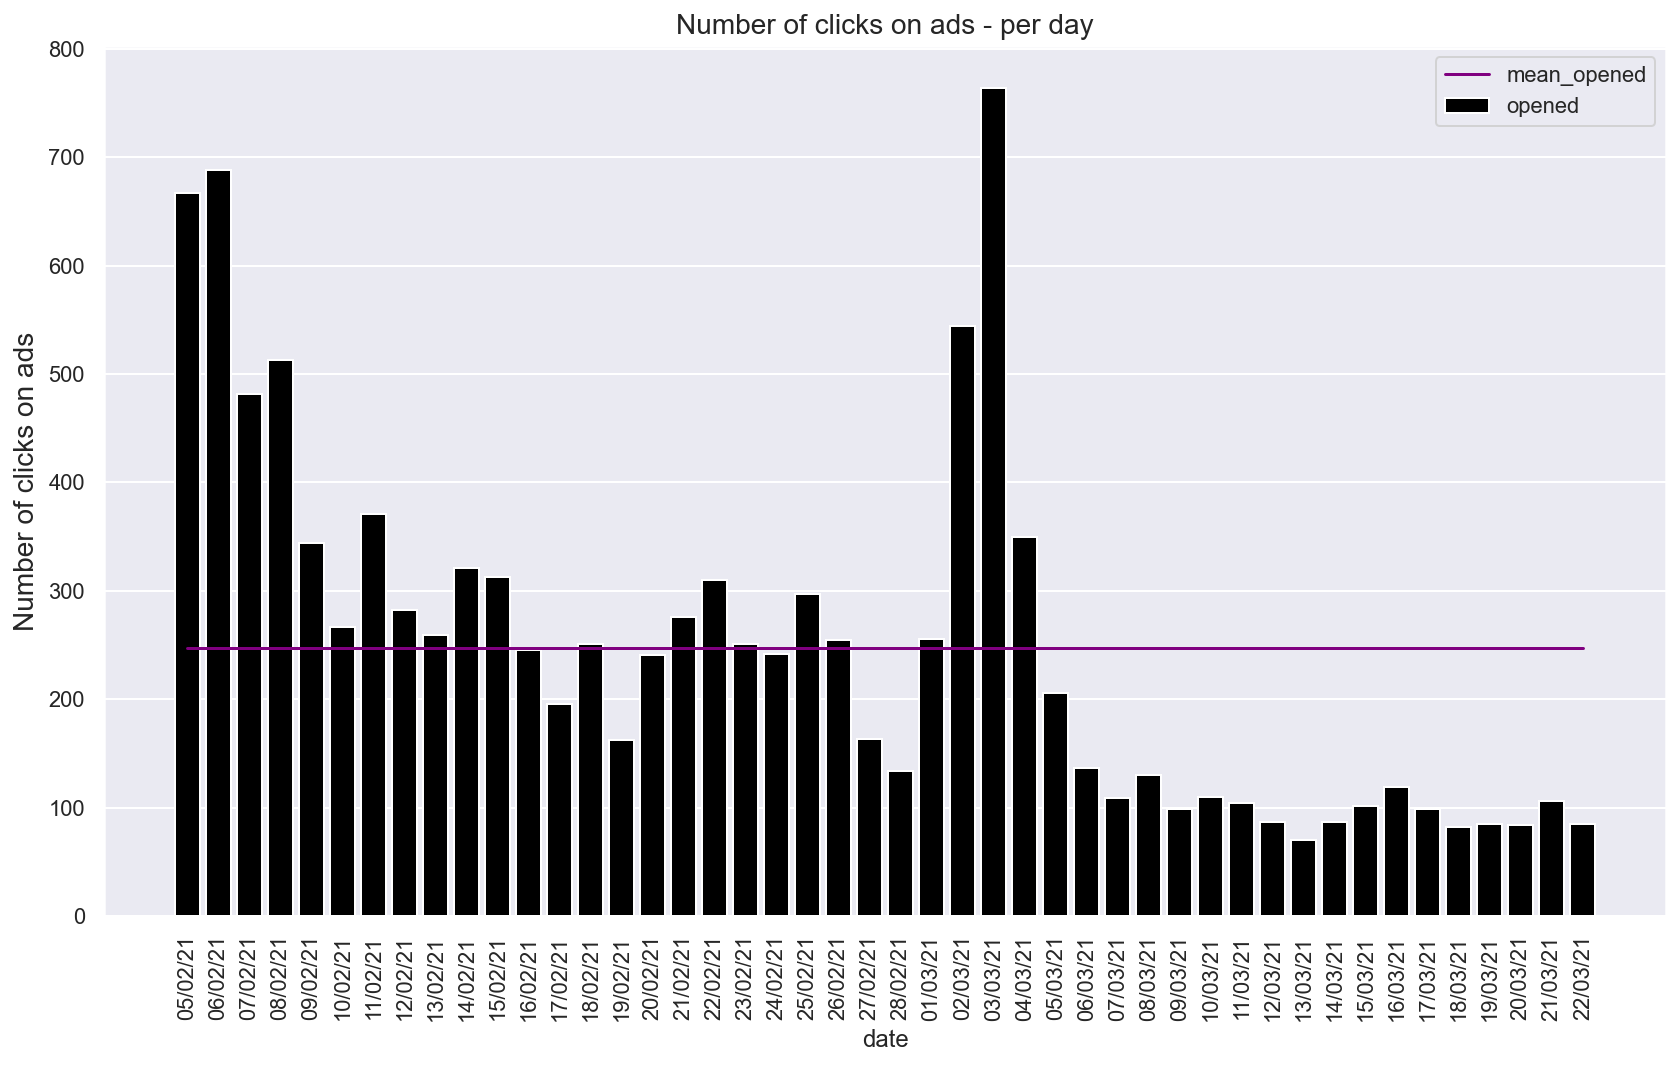

In [40]:
#Visualize the number of adds opened per day
ax4 = sns.barplot(x=pv.index, y="opened", data=pv, label="opened", color='black')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels)
ax5 = sns.lineplot(data=mean, color='purple', label='mean_opened')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels)
plt.title('Number of clicks on ads - per day', fontsize=14)
plt.xticks(rotation='vertical')
plt.ylabel('Number of clicks on ads', fontsize=14)

plt.show()

In [41]:
### Add a new column with the CRT
pv['%_CTR'] = (pv['opened']/pv['received'])*100

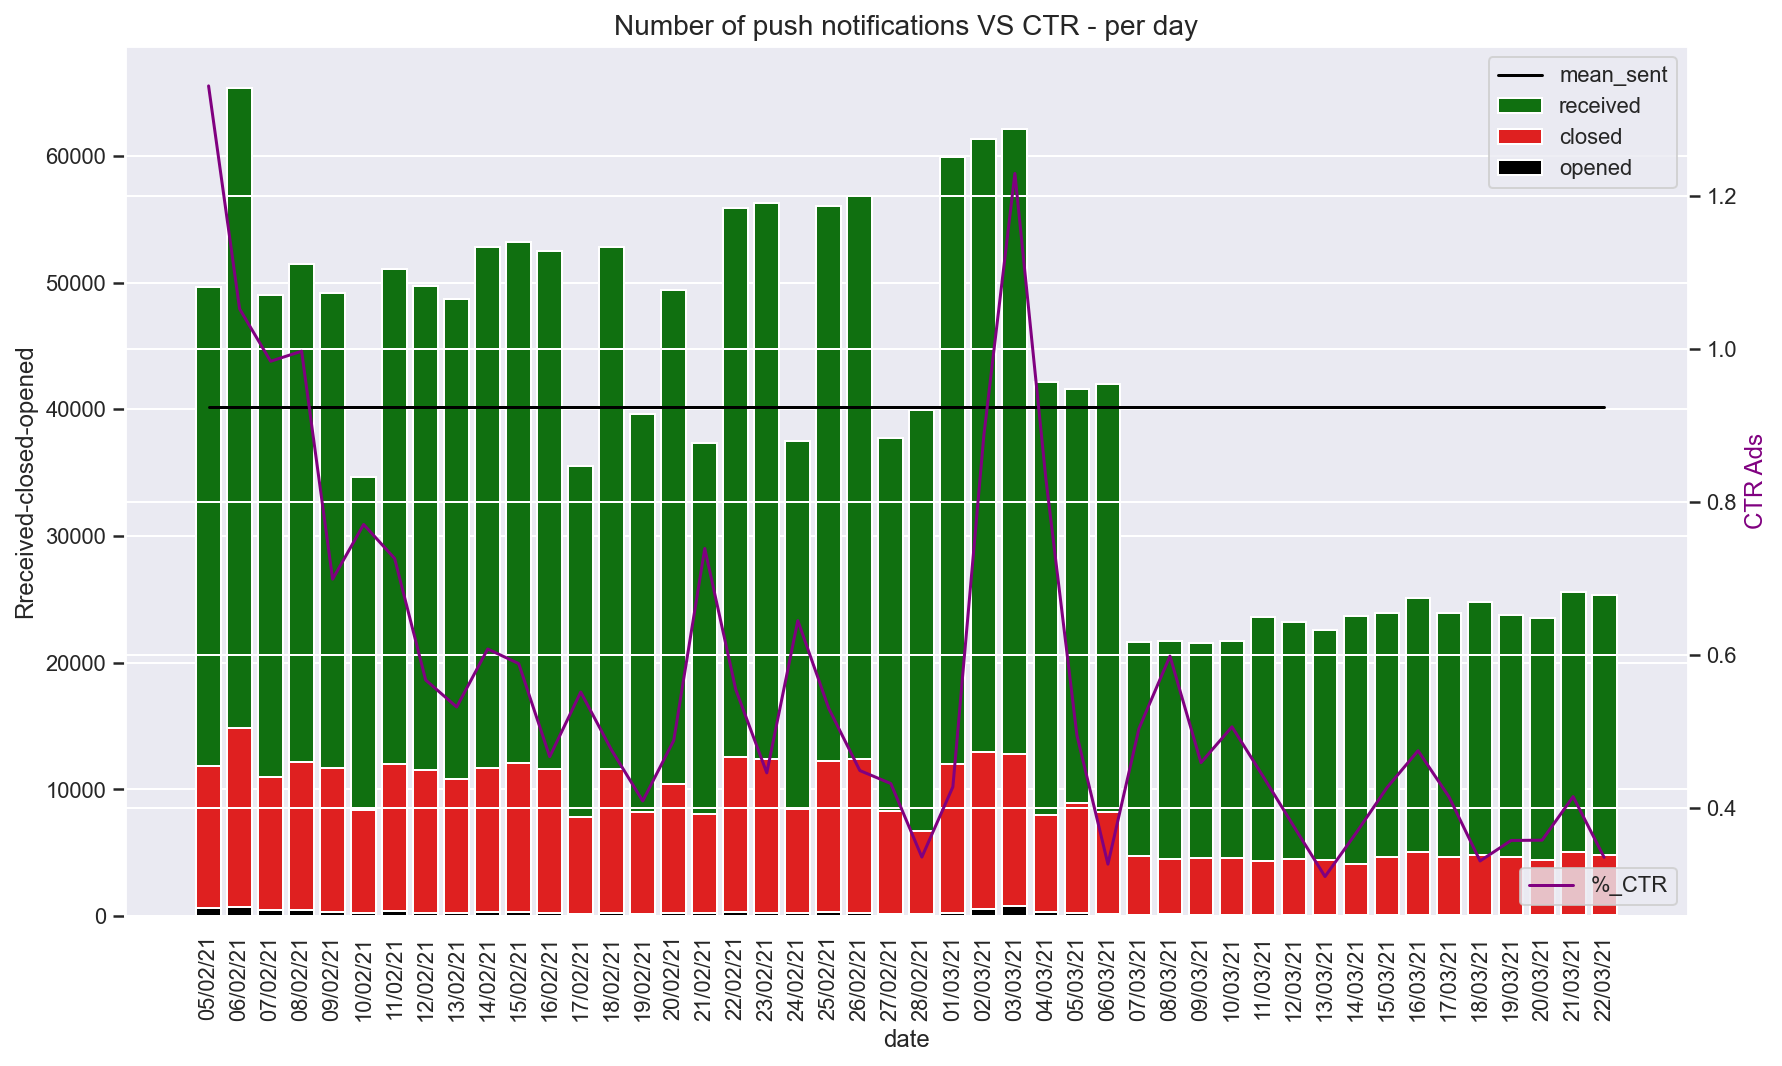

In [42]:

# Calculate the mean
mean = []
for i in range(len(pv)):
    mean.append(pv['received'].mean().round())
    i += 1
#Visualize the number of push, received, closed, and opened per day VS CTR per Day second Y axis
plt.title('Number of push notifications VS CTR - per day', fontsize=14)

plt.xticks(rotation='vertical')

ax1 = sns.barplot(x=pv.index, y="received", data=pv, label="received", color='green')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

ax2= sns.barplot(x=pv.index, y="closed", data=pv, label="closed", color='red')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)

ax3 = sns.barplot(x=pv.index, y="opened", data=pv, label="opened", color='black')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels)
ax3.set_ylabel('Rreceived-closed-opened')

ax4 = sns.lineplot(data=mean, color='black', label='mean_sent')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels)

ax5 = ax4.twinx()

ax5 = sns.lineplot(x=pv.index, y="%_CTR", data=pv, label="%_CTR", color='purple')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels, loc='lower right')
ax5.set_ylabel('CTR Ads', color='purple')

plt.show()

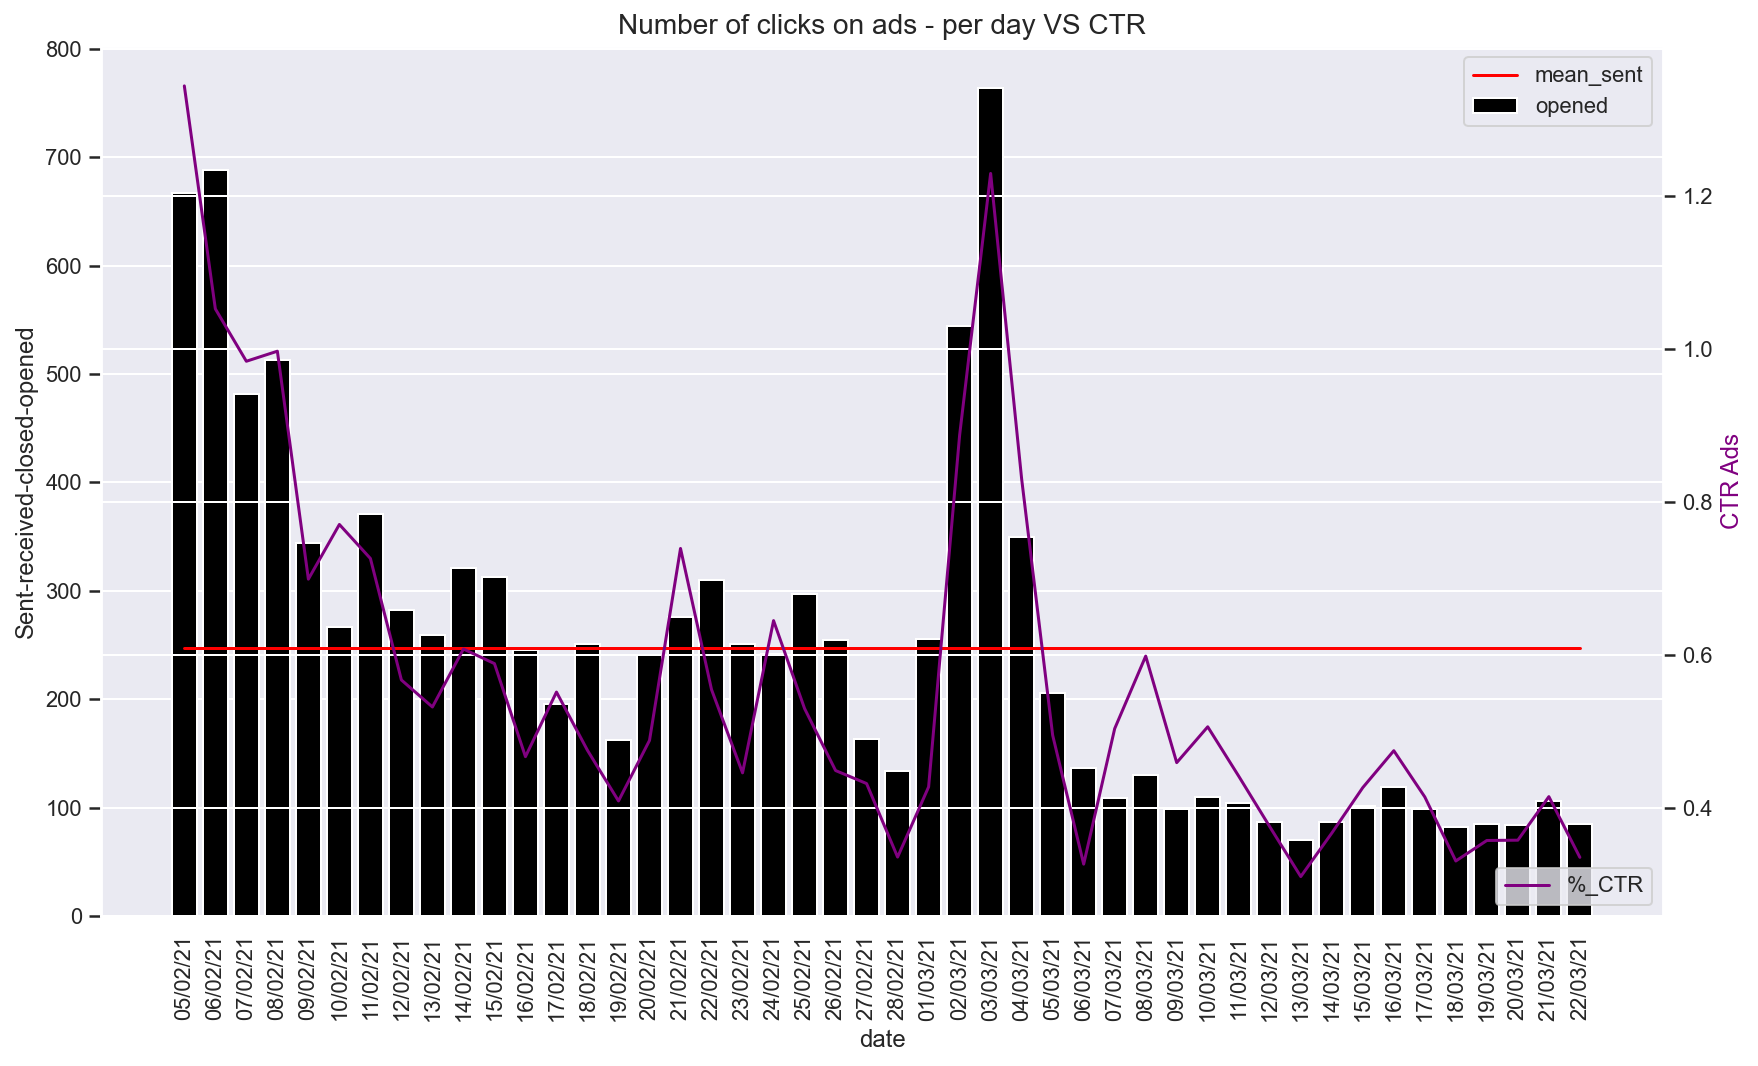

In [43]:
# Calculate the mean
mean = []
for i in range(len(pv)):
    mean.append(pv['opened'].mean().round())
    i += 1
#Visualize the number of push opened per day VS CTR per Day second Y axis
plt.xticks(rotation='vertical')
ax3 = sns.barplot(x=pv.index, y="opened", data=pv, label="opened", color='black')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels)
ax3.set_ylabel('Sent-received-closed-opened')

ax4 = sns.lineplot(data=mean, color='red', label='mean_sent')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels)


ax5 = ax4.twinx()

ax5 = sns.lineplot(x=pv.index, y="%_CTR", data=pv, label="%_CTR", color='purple')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels, loc='lower right')
ax5.set_ylabel('CTR Ads', color='purple')

plt.title('Number of clicks on ads - per day VS CTR', fontsize=14)
plt.xticks(rotation='vertical')
plt.savefig('Number of clicks on ads - per day VS CTR - per day.png')
plt.show()

# Pivot Table with index 'Day_Name' and count of pushs, received, closed, and opened

In [45]:
pv = pv.reset_index()
pv['day_name'] = pd.to_datetime(pv['date'], format='%d/%m/%y').dt.strftime('%A')
pv.set_index('date', inplace=True)
pv_day = pv.groupby('day_name').agg('mean').round(2)
pv_day = pv_day.reset_index()
#To plot the day name in order, I created a categorical variable in order.
pv_day['day_name'] = pd.Categorical(pv_day['day_name'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
pv_day.set_index('day_name', inplace=True)

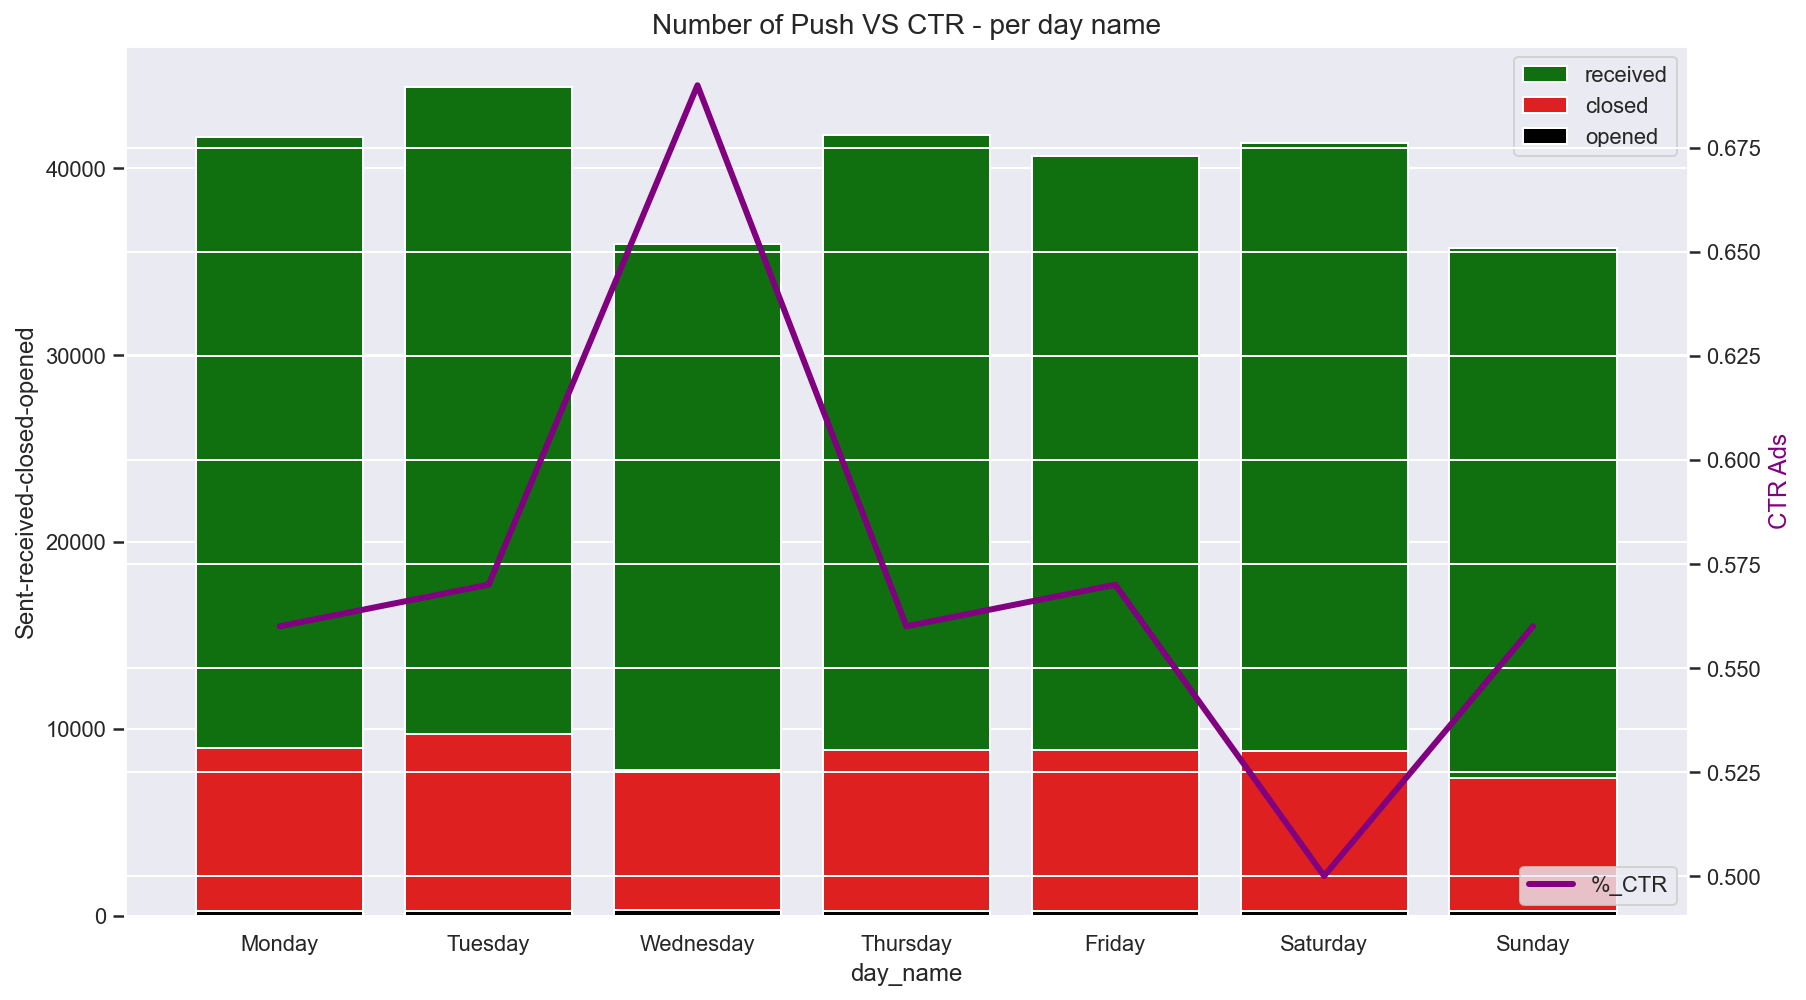

In [46]:
#Visualize the number of adds opened per day and the CTR per day name
plt.title('Number of Push VS CTR - per day name', fontsize=14)

ax2 = sns.barplot(x=pv_day.index, y="received", data=pv_day, label="received", color='green')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)

ax3= sns.barplot(x=pv_day.index, y="closed", data=pv_day, label="closed", color='red')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels)

ax4 = sns.barplot(x=pv_day.index, y="opened", data=pv_day, label="opened", color='black')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels)
ax4.set_ylabel('Sent-received-closed-opened')

ax5 = ax4.twinx()

ax5 = sns.lineplot(x=pv_day.index, y="%_CTR", data=pv_day, label="%_CTR", color='purple', lw=3)
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels, loc='lower right')
ax5.set_ylabel('CTR Ads', color='purple')

plt.show()

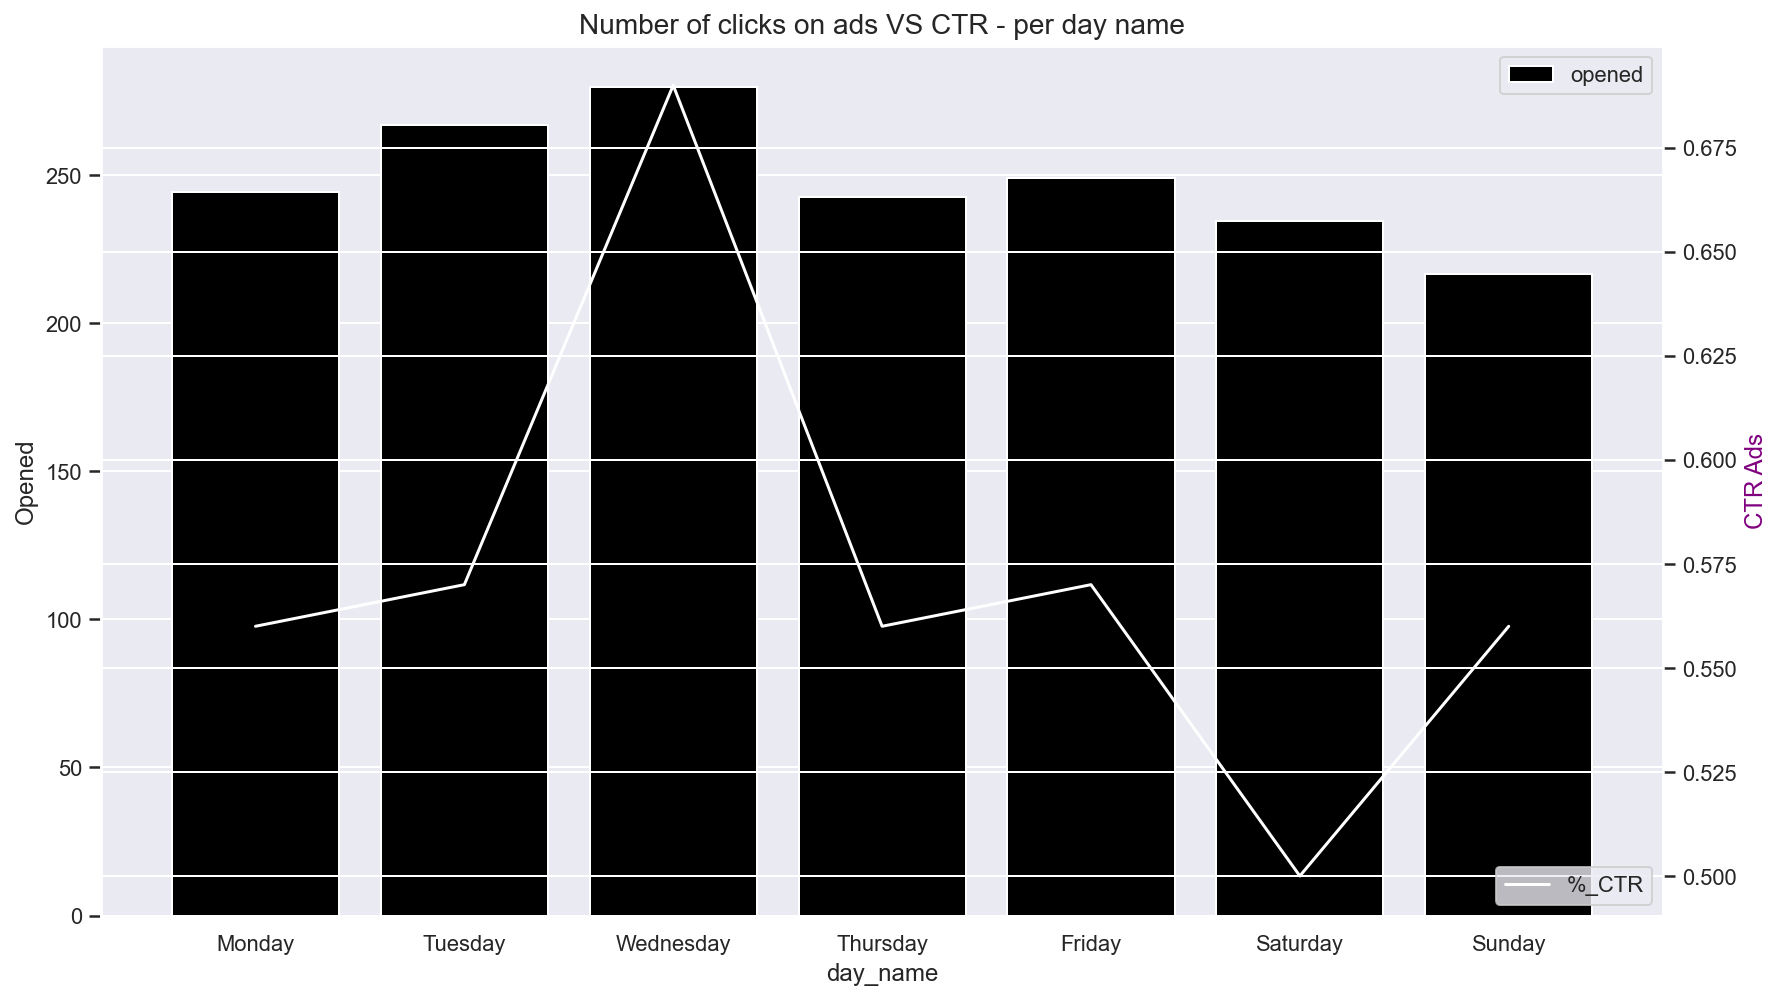

In [47]:
#Plot the number of opened adds and the CTR per day 

ax4 = sns.barplot(x=pv_day.index, y="opened", data=pv_day, label="opened", color='black')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels)
ax4.set_ylabel('Opened')

ax5 = ax4.twinx()

ax5 = sns.lineplot(x=pv_day.index, y="%_CTR", data=pv_day, label="%_CTR", color='white')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels, loc='lower right')
ax5.set_ylabel('CTR Ads', color='purple')


plt.title('Number of clicks on ads VS CTR - per day name', fontsize=14)
plt.xticks(rotation='vertical')
plt.savefig('Number of clicks on ads VS CTR - per day name.png')
plt.show()

# Pivot Table with index 'Week Number' and count of pushs, received, closed, and opened

In [48]:
pv_week = pv.copy()
pv_week = pv_week.reset_index()
pv_week['week_number'] = pd.to_datetime(pv_week['date'], format='%d/%m/%y').dt.strftime('%W')
pv_week.drop('day_name', axis=1, inplace=True)
#Group by week number
pv_week = pv_week.groupby('week_number').agg('mean').round(2)

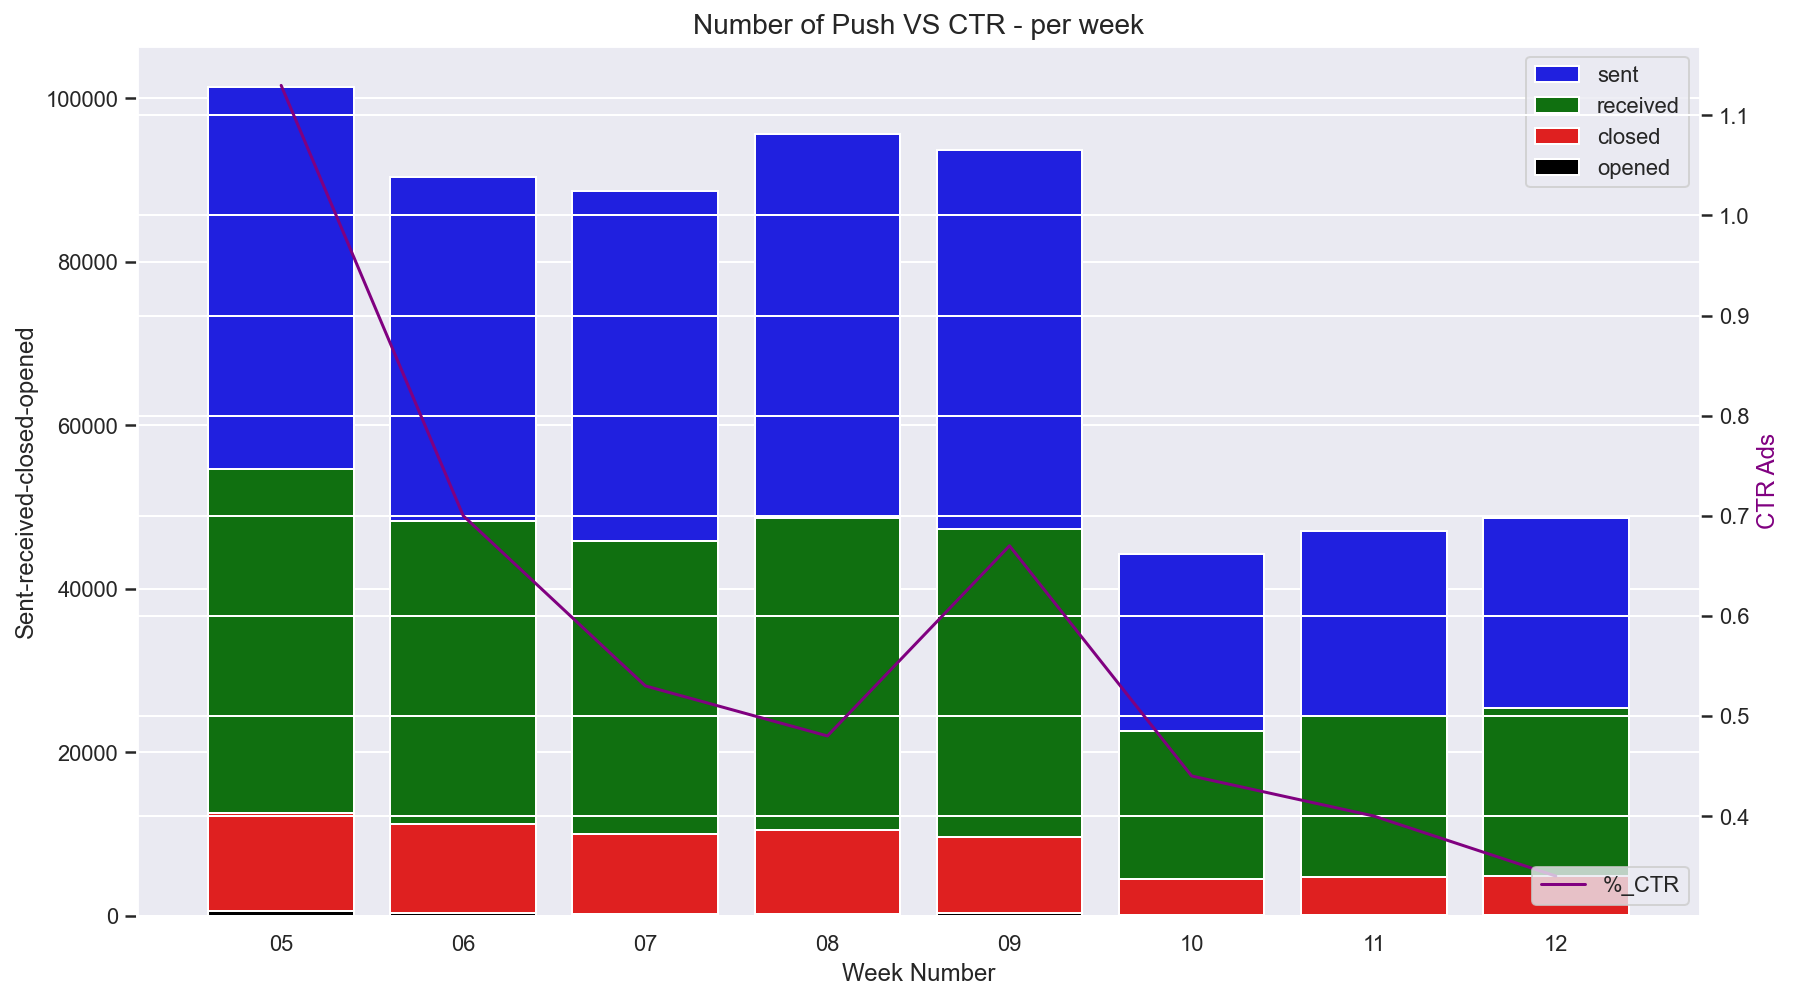

In [49]:
#Visualize the number of adds opened and the CTR per week
plt.title('Number of Push VS CTR - per week', fontsize=14)

ax1 = sns.barplot(x=pv_week.index, y="sent", data=pv_week, label="sent", color='blue')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

ax2 = sns.barplot(x=pv_week.index, y="received", data=pv_week, label="received", color='green')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels)

ax3= sns.barplot(x=pv_week.index, y="closed", data=pv_week, label="closed", color='red')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels)

ax4 = sns.barplot(x=pv_week.index, y="opened", data=pv_week, label="opened", color='black')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels)
ax4.set_ylabel('Sent-received-closed-opened')
ax4.set_xlabel('Week Number')

ax5 = ax4.twinx()

ax5 = sns.lineplot(x=pv_week.index, y="%_CTR", data=pv_week, label="%_CTR", color='purple')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels, loc='lower right')
ax5.set_ylabel('CTR Ads', color='purple')

plt.show()

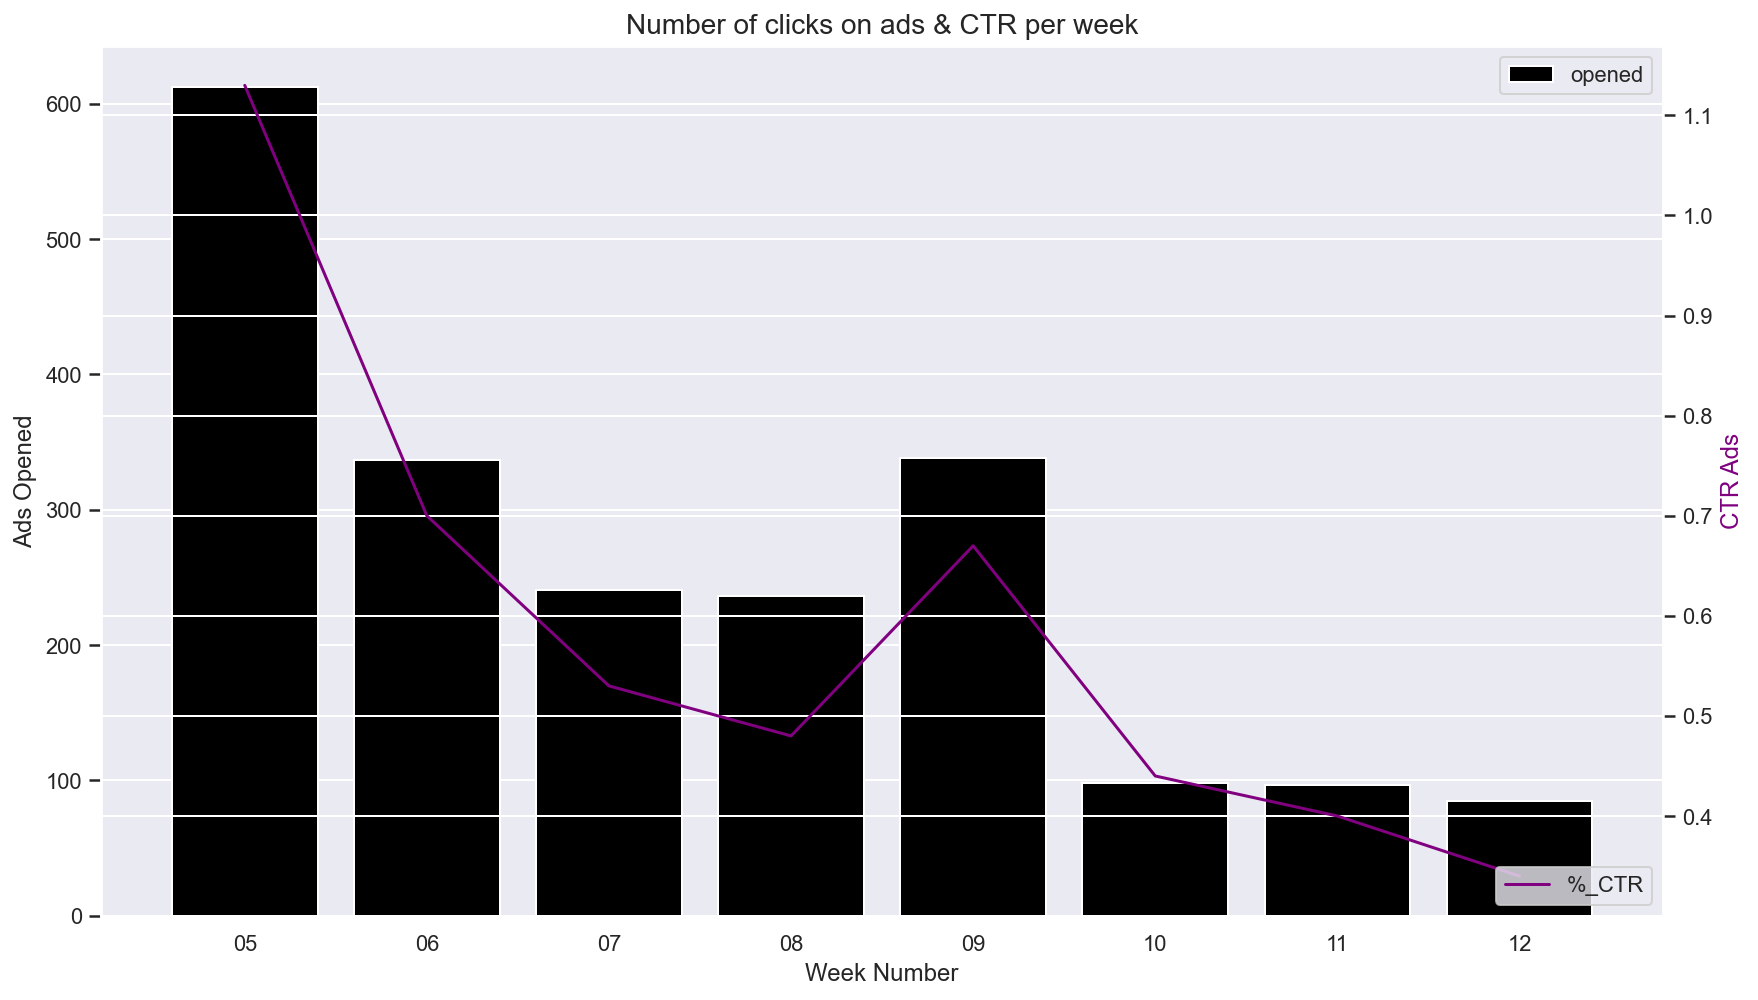

In [50]:
#Plot the number of opened adds and the CTR per week 

ax4 = sns.barplot(x=pv_week.index, y="opened", data=pv_week, label="opened", color='black')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels)
ax4.set_ylabel('Ads Opened')
ax4.set_xlabel('Week Number')
ax5 = ax4.twinx()

ax5 = sns.lineplot(x=pv_week.index, y="%_CTR", data=pv_week, label="%_CTR", color='purple')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels, loc='lower right')
ax5.set_ylabel('CTR Ads', color='purple')

plt.title('Number of clicks on ads & CTR per week', fontsize=14)
plt.xticks(rotation='vertical')

plt.show()

# Pivot table with Index "Hour" ('00-23') and count of pushs, receiveds, closeds and openeds.

In [59]:
pv_hour = inner.copy()
pv_hour['received'] = pv.received.astype('int64')
pv_hour = inner.pivot_table(index=pd.to_datetime(inner['sentTs_x'], unit='ms').dt.strftime('%H'), aggfunc=np.sum)[['closed','opened', 'received', 'sent']]
pv_hour['%_CTR'] = (pv_hour['opened']/pv_hour['received'])*100

In [66]:
pv_hour = inner.copy()

pv_hour['received'] = pv.received.astype('int64')

pv_hour = inner.pivot_table(index=pd.to_datetime(inner['sentTs_x'], unit='ms').dt.strftime('%H'), aggfunc=np.sum)[['closed','opened', 'received', 'sent', 'sentSuccess']]

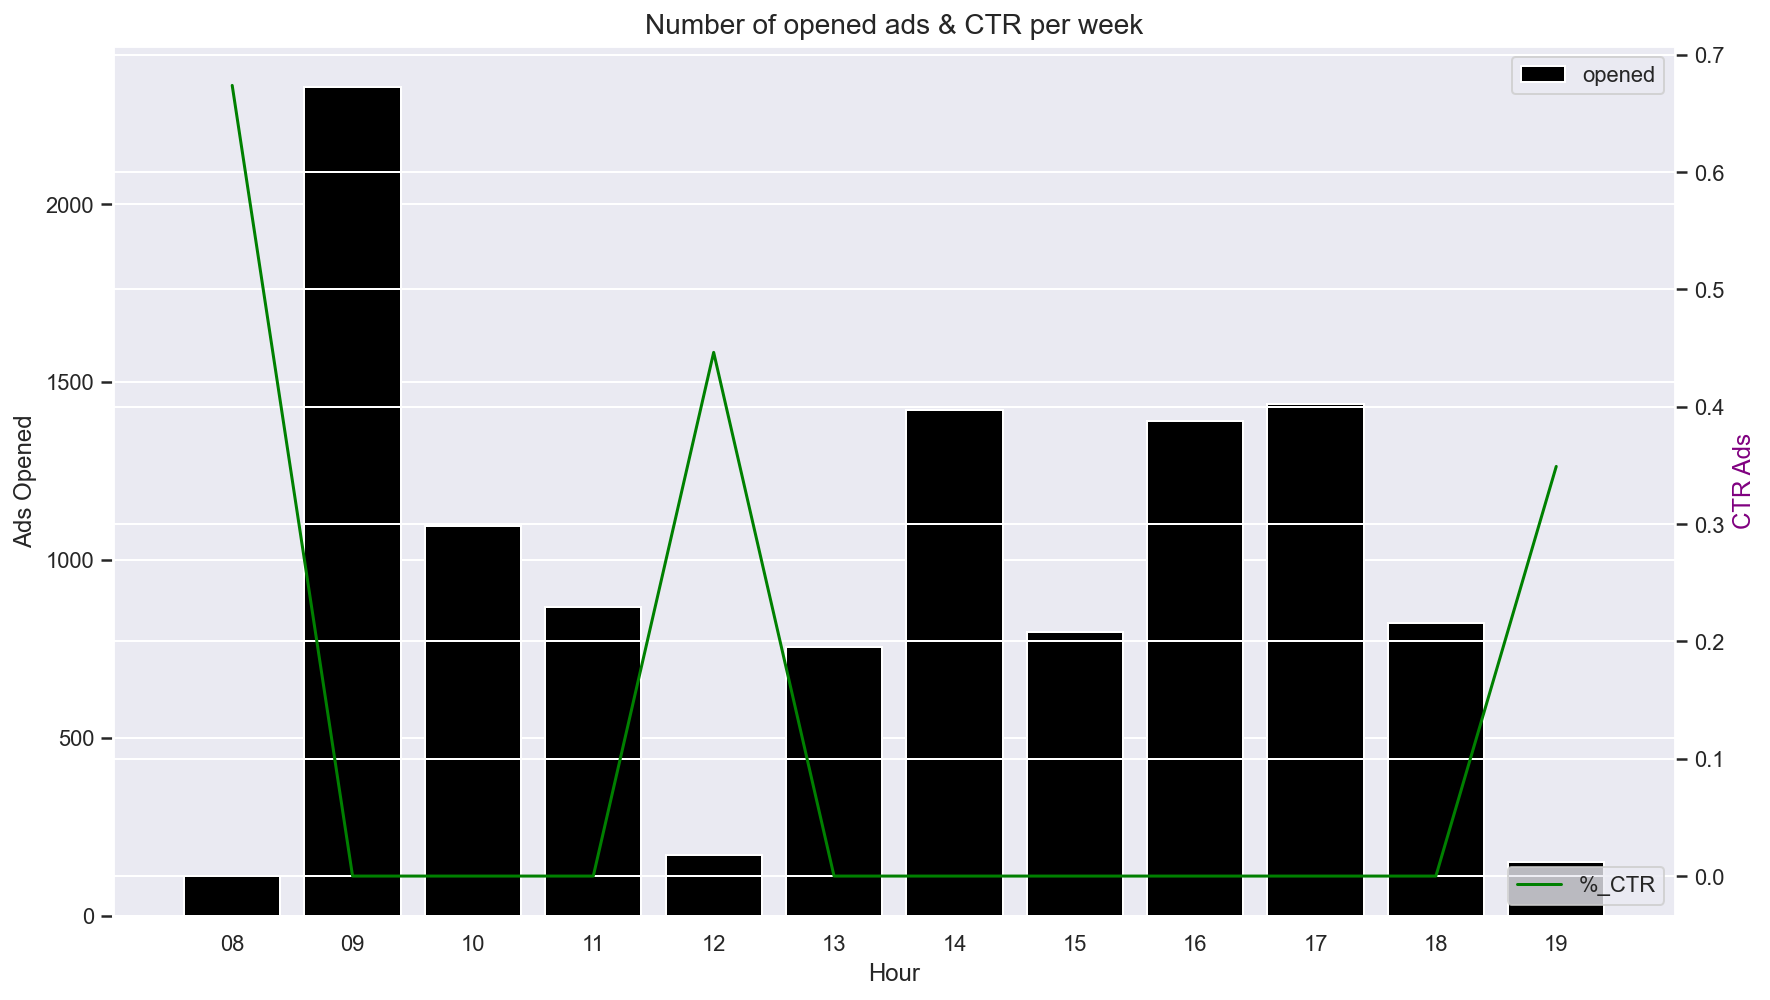

In [64]:
#Plot the number of opened adds and the CTR per week 
ax4 = sns.barplot(x=pv_hour.index, y="opened", data=pv_hour, label="opened", color='black')
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels)
ax4.set_ylabel('Ads Opened')
ax4.set_xlabel('Hour')
ax5 = ax4.twinx()

ax5 = sns.lineplot(x=pv_hour.index, y="%_CTR", data=pv_hour, label="%_CTR", color='green')
handles, labels = ax5.get_legend_handles_labels()
ax5.legend(handles, labels, loc='lower right')
ax5.set_ylabel('CTR Ads', color='purple')

plt.title('Number of opened ads & CTR per week', fontsize=14)
plt.xticks(rotation='vertical')

plt.show()

### Marginal probability per repetition

In [70]:
# There are some push wiht the same AD_ID that were sent to the same user at the same exact datetime. Let's get rid of them
print(inner.shape)
inner = inner.drop_duplicates(subset =['subscriberId', 'sentTs_x', 'ad_id'])
print(inner.shape)
#total of rows removed 3074

(3568997, 17)
(3565923, 17)


In [167]:
#Create a dataframe to work in the probabilities per repetition
proba = inner.copy()
#Updating datetime
proba['sentTs_x'] = pd.to_datetime(proba['sentTs_x'], unit='ms').dt.strftime('%d/%m/%y %H:%M')

In [168]:
#Set SentTs_x as DatetimeIndex, it is needed to order the dates correctly
proba.index = pd.DatetimeIndex(proba.sentTs_x.values, dtype='datetime64[ns]', name='date', freq=None, dayfirst=True)

In [169]:
#Transforming the DataFrame to be able to know the number of repetition per user. Since the same AD_ID was sent as max 80 times to the same user we are rolling to get the 80 repetitions 
#This take about 30 min. 
proba = proba.sort_index(level=(0,1,2), ascending=True).groupby(['subscriberId', 'ad_id', 'date'])[['sent', 'received', 'closed', 'opened']].rolling(80,min_periods=1).sum()

In [170]:
#As the last two lines takes more than 30 min, it is a good moment to do a backup. 
proba_backup = proba.copy()
#proba = proba_backup.copy()

In [152]:
#Remove unnecesary index.
proba.reset_index(level=(3), inplace=True)
proba.drop('level_3', axis=1, inplace=True)

In [175]:
#Create a new column for the first click in the Adds. - If True, it is the first time the user click the Adds. 
proba2 = proba.copy()
foo=proba2.sort_index(level=(0,1,2), ascending=False).dropna(subset=['opened'])
foo2=foo.reset_index().groupby(proba2.index.names[:-1]).apply(lambda x: x.head(1))
foo2['first_click'] = True
foo3=foo2.reset_index(drop=True).set_index(['subscriberId', 'ad_id', 'date']).copy()
proba['first_click']=foo3.first_click
proba.first_click.fillna(0, inplace=True)
proba.first_click=proba.first_click.map({0:False, True:True})

In [176]:
#Cumulative Sum for the Sent, received, closed, opened. We need to count the number of times that we had an event
proba['sent'] = proba.sort_index(level=(0,1,2), ascending=True).groupby(['subscriberId','ad_id'])['sent'].cumsum()
proba['received'] = proba.sort_index(level=(0,1,2), ascending=True).groupby(['subscriberId','ad_id'])['received'].cumsum()
proba['closed'] = proba.sort_index(level=(0,1,2), ascending=True).groupby(['subscriberId','ad_id'])['closed'].cumsum()
proba['opened'] = proba.sort_index(level=(0,1,2), ascending=True).groupby(['subscriberId','ad_id'])['opened'].cumsum()
proba.fillna(0, inplace=True)

In [489]:
def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.4f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)   
#https://stackoverflow.com/questions/59143306/add-label-values-to-bar-chart-and-line-chart-in-matplotlib


In [490]:
def plot_repetition_rate(number_of_repetions=0):
    #This function display a line plot with the marginal probabilities per repetition
    #input: the number of repetitions you want to visualize
    #Output: the line plot
    x={}
    number_of_repetions = int(input('Add the number of Ads repetitions to visualize the probability of clicking\n'))
    number_of_repetions = number_of_repetions+1
    for i in range(1, number_of_repetions):
        result = 'repetition'+'_'+str(i)
        x[result] = ((proba.loc[(proba['first_click']==True)&(proba['received']==i)].count()[3]/proba.loc[proba['received']==i].count()[1])*100).round(4)
    z = pd.Series(x)
    z = pd.DataFrame(z)
    suma = z[0].mean()
    plt.title('probability of clicking by Ads repetition');
    ax4 = sns.lineplot(data=z, x=z.index, y=z[0], label='Probability', lw=4);
    handles, labels = ax4.get_legend_handles_labels();
    ax4.legend(handles, labels);
    ax4.set_ylabel('Probability');
    ax4.set_xlabel('Repetition');
    plt.xticks(rotation='45');
    set_sns_format(width=14, height=8)
    add_value_labels(ax4, 'line', spacing=5)
    plt.savefig('GithubProbability.png')
    return ax4, suma

Add the number of Ads repetitions to visualize the probability of clicking
10


(<AxesSubplot:title={'center':'probability of clicking by Ads repetition'}, xlabel='Repetition', ylabel='Probability'>,
 0.3824)

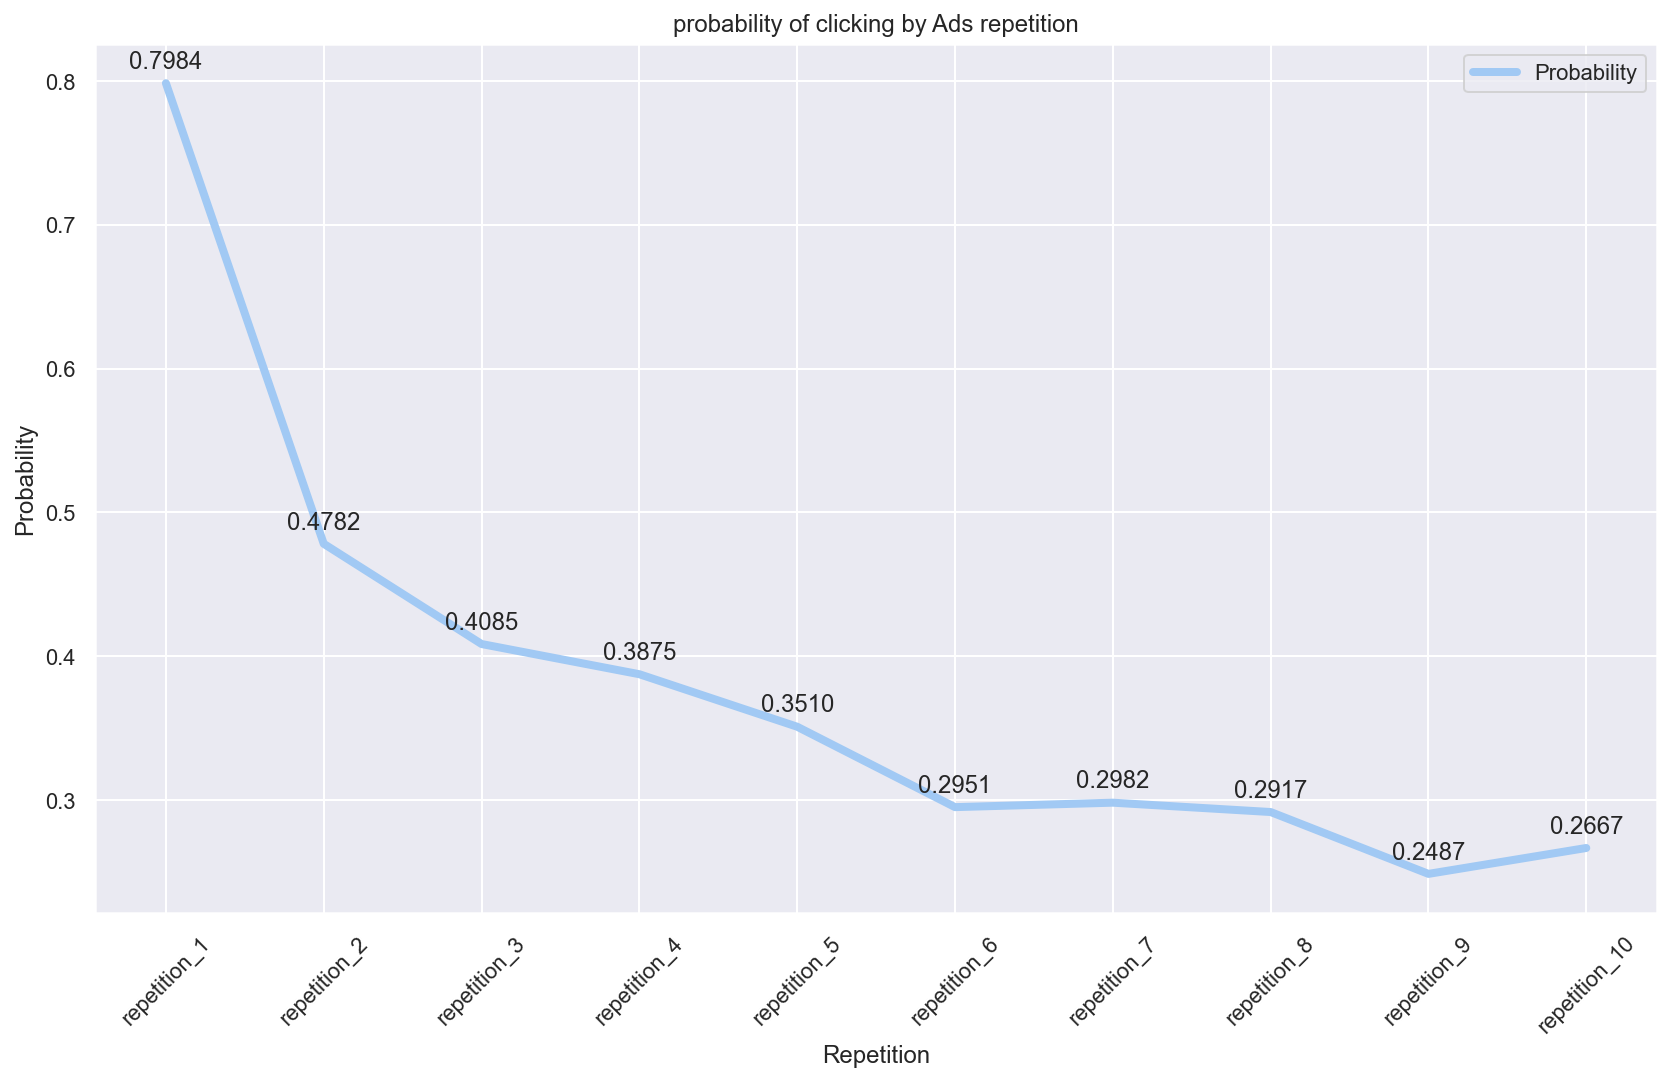

In [491]:
plot_repetition_rate(number_of_repetions=0)

In [373]:
# Explanantion of the formula used to get the probabilities
print('The count of all Ads opened at the n (in this case the first time) repetition\n', proba.loc[(proba['first_click']==True)&(proba['received']==1)].count()[3], '\n')

print('Dived by\n')

print('The count of all ads received (impressions) by the first time\n', proba.loc[proba['received']==1].count()[1], '\n')

print('Folowing plots follow the same logic')

The count of all Ads opened at the n (in this case the first time) Repetition
 4568 

Dived by

The count of all ads received (impressions) by the first time
 572168 

Folowing plots follow the same logic


### Conditiona probability per repetition

In [494]:
def conditional_repetition_rate(number_of_repetions=0):
    x={}
    number_of_repetions = int(input('Add the number of Ads repetitions to visualize the probability of clicking\n'))
    number_of_repetions = number_of_repetions+1
    for i in range(2, number_of_repetions):
        result = 'repetition'+'_'+str(i)
        x[result] = (100*((proba['sent'].loc[(proba.received==i) & (proba.first_click==1)]).count())/((proba['sent'].loc[(proba.received==i-1) & (proba.first_click==0)]).count())).round(2)
    z = pd.Series(x)
    z = pd.DataFrame(z)
    suma = z[0].mean()
    plt.title('Conditional probability of clicking by Ads repetition');
    ax4 = sns.lineplot(data=z, x=z.index, y=z[0], label='Probability', lw=4);
    handles, labels = ax4.get_legend_handles_labels();
    ax4.legend(handles, labels);
    ax4.set_ylabel('Probability');
    ax4.set_xlabel('Repetition');
    plt.xticks(rotation='45');
    set_sns_format(width=14, height=8)
    add_value_labels(ax4, 'line', spacing=5)
    plt.savefig('GithubConditionalProbability.png')
    return ax4, suma

Add the number of Ads repetitions to visualize the probability of clicking
10


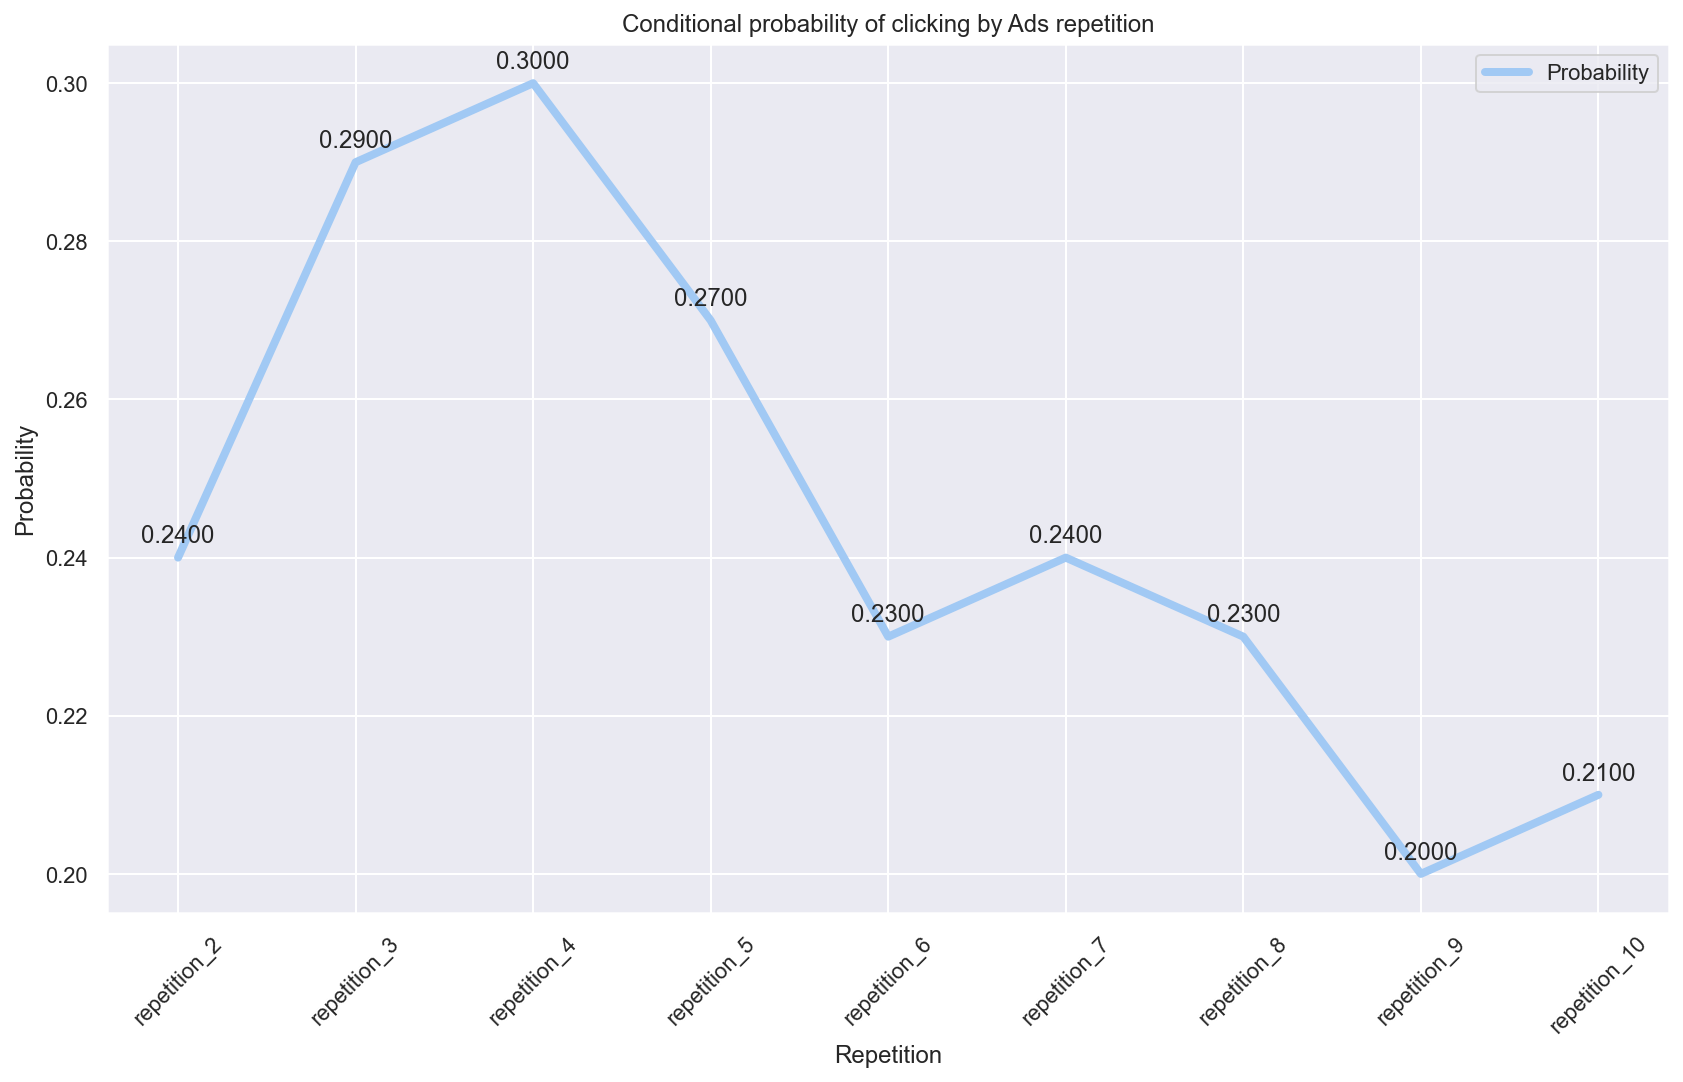

In [495]:
conditional_repetition_rate(number_of_repetions=0)


### CTR by Repetition

In [262]:
ctr = proba.copy()

In [263]:
ctr.shape

(3565923, 5)

In [264]:
#Calculate the AD_ID count of repetions per user. 
ctr['repetition_count'] = ctr.sort_index(level=(0,1,2), ascending=True).groupby(['subscriberId','ad_id'])['received'].count().round().astype('int64')

In [265]:
#Calculate the AD_ID count of repetions per user. 
ctr['repetition_count'] = ctr.sort_index(level=(0,1,2), ascending=True).groupby(['subscriberId','ad_id'])['received'].count().round().astype('int64')
#Group by [AD_ID - repetition_count] to calculate the CTR per repetition (opened/Received)
ctr = ctr.reset_index(level=(0,2)).groupby(['ad_id', 'repetition_count'])['received', 'opened'].sum()
#Calculate CTR
ctr['ctr'] = ((ctr['opened']/ctr['received'])*100).fillna(0).round(3)
#Remove AD_ID no received and AD_ID not opened 
ctr = ctr.loc[(ctr['received']>0)&(ctr['opened']>0)]
#Average of Ads Reveived | opened and CTR per repetition
ctr = ctr.reset_index(level=(0,1)).groupby('repetition_count')['received', 'opened', 'ctr'].mean().round(3)

<ipython-input-265-6adbd2a248e4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ctr = ctr.reset_index(level=(0,2)).groupby(['ad_id', 'repetition_count'])['received', 'opened'].sum()


In [496]:
def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.2f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)   
#https://stackoverflow.com/questions/59143306/add-label-values-to-bar-chart-and-line-chart-in-matplotlib

In [497]:
def ctr_repetition_rate(number_of_repetions=0):
    #This function display a line plot with the average CTR per repetition
    #input: the number of repetitions you want to visualize
    #Output: the line plot
    number_of_repetions = int(input('Add the number of Ads repetitions to visualize the ctrbility of clicking\n'))
    z = ctr[:number_of_repetions]
    number_of_repetions = number_of_repetions+1
    ax4 = sns.lineplot(data=z, x=z.index.astype('int64'), y=z['ctr'], label='ctr_per_repetition', lw=4,);
    handles, labels = ax4.get_legend_handles_labels();
    ax4.legend(handles, labels);
    ax4.set_ylabel('CTR');
    ax4.set_xlabel('Repetition');
    plt.xticks(rotation='45');
    set_sns_format(width=14, height=8)
    add_value_labels(ax4, 'line', spacing=5)
    plt.savefig('CTR_per_repetition.png')
    return ax4

Add the number of Ads repetitions to visualize the ctrbility of clicking
10


<AxesSubplot:xlabel='Repetition', ylabel='CTR'>

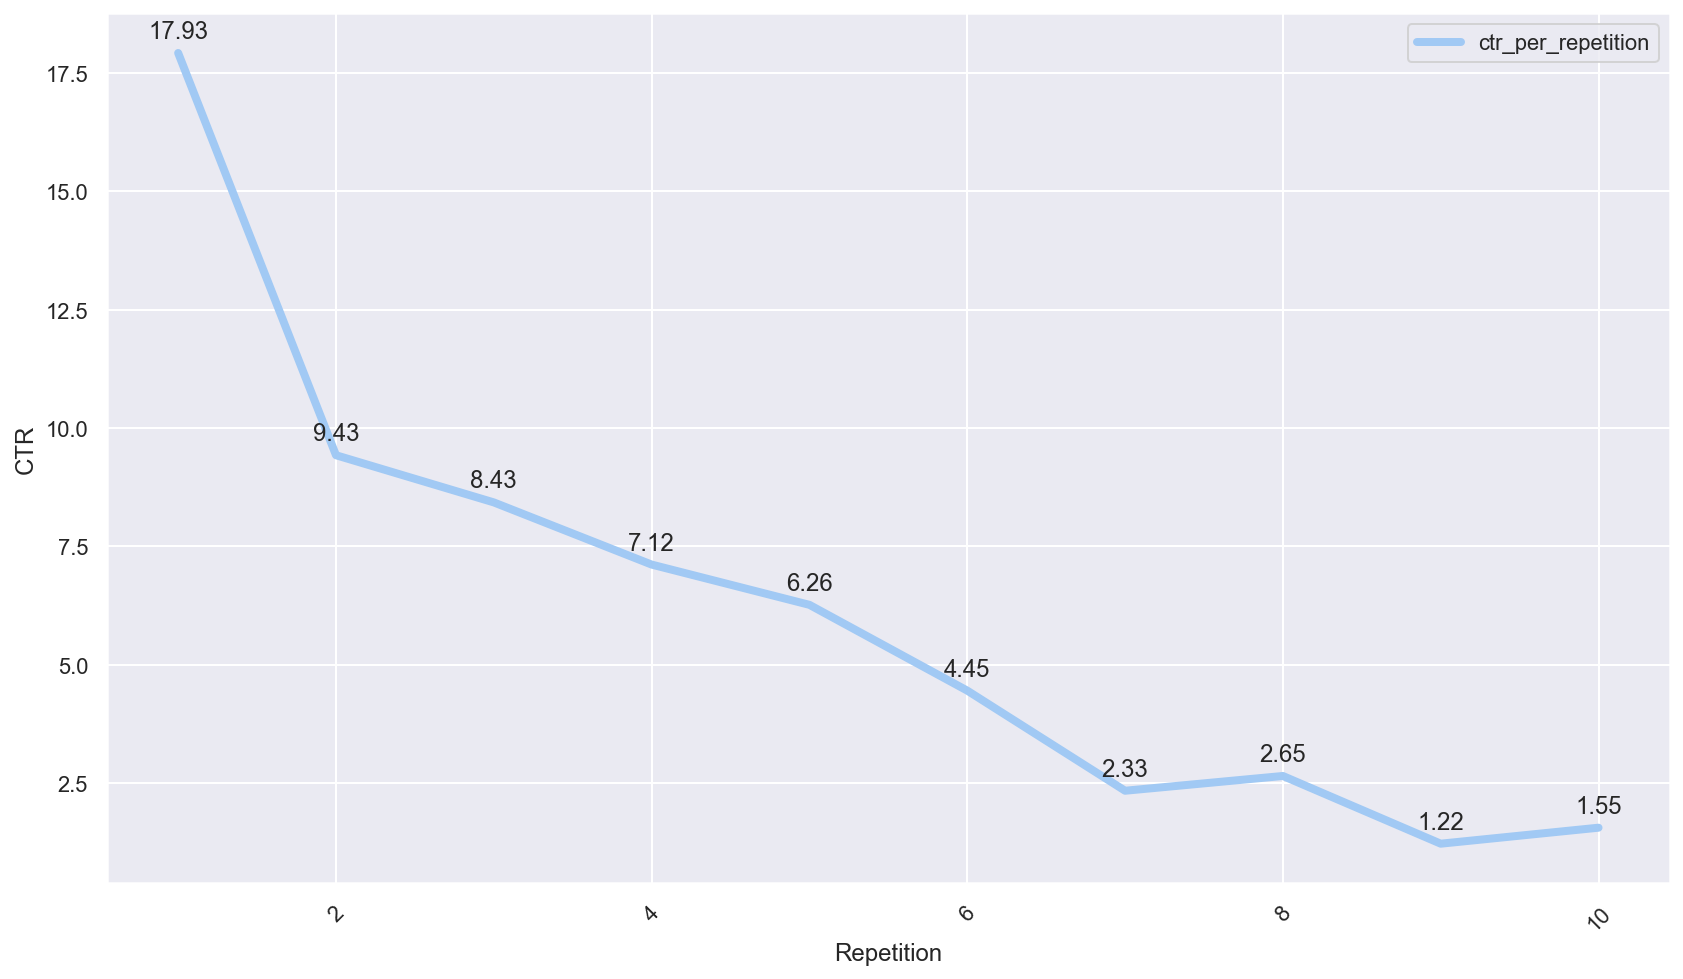

In [498]:
ctr_repetition_rate(number_of_repetions=0)

### Opened rate average by number of Days Susbcribed

In [380]:
#New DataFrame to analyze subscriber interation over the time
subscriber = inner.copy()

In [383]:
subscriber['sentTs_x'] = change_date_time(subscriber['sentTs_x'] , date_format=date_format)

1- for d/m/y h:m:s

2- for d/m/y

3- for day_name

4- for hour on 24h 

5 for month on number 2 - 3 

Pleae choose 1 - 2 - 3 - 4 - 5
2


In [386]:
#Transfor date to pd.DatetimeIndex
subscriber.index = pd.DatetimeIndex(subscriber.sentTs_x.values, dtype='datetime64[ns]', name='date', freq=None, dayfirst=True)

In [387]:
#Group by ['subscriberId', 'date'] and take the needed features ['sent', 'received', 'closed', 'opened'] 
subscriber=subscriber.reset_index().set_index(['subscriberId', 'date']).sort_index(level=(0,1), ascending=True)[['sent', 'received', 'closed', 'opened']]

In [390]:
#As the below two lines take a while to be executed it is a good moment to do a backup
#subscriber_backup = subscriber.copy()
subscriber = subscriber_backup.copy()

In [399]:
#Caluclate the diff
subscriber['date_diff'] = (subscriber.reset_index(level=(0,1)).groupby('subscriberId')['date'].diff()).values

In [401]:
#Filling NAT values with 0
subscriber['date_diff'] = subscriber['date_diff'].fillna(pd.Timedelta('0 days'))

In [403]:
#Calculate the number of days subscribed
subscriber['date_cumsum'] = subscriber.groupby('subscriberId')['date_diff'].apply(lambda x : x.cumsum())

In [408]:
#Sum '1 days' to the date_cum_sum
subscriber['date_cumsum'] = subscriber['date_cumsum'].apply(lambda x : x+'1 days')

In [433]:
#Select only the max value for user to get the number of subscritions days
total_days = pd.DataFrame(subscriber.groupby('subscriberId')['date_cumsum'].apply(lambda x : x.max()))

In [439]:
#Prepare the subscriber dataframe to merge it with the total_days subscribed
subscriber.reset_index(level=1, inplace=True)

In [440]:
#Merge subscriber data frame and number of total days per subscriberId
subscriber['total_days'] = total_days

In [457]:
#Double check to secure that the total_days has the right format.
total_days = subscriber['total_days'].apply(lambda x : pd.Timedelta(x))

In [458]:
#Group by the 'subscriberId' and the needed features [['received', 'closed','opened']]
subscriber = subscriber.groupby('subscriberId')[['received', 'closed','opened']].cumsum()

In [459]:
#Merge subscriber data frame and number of total days per subscriberId
subscriber['total_days'] = total_days

In [464]:
#Filling NAN values
subscriber['received', 'closed','opened'].fillna(0, inplace=True)

C:\Users\israe\miniconda3\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [482]:
#Group by total_days before ploting.
subscriber = subscriber.reset_index().groupby('total_days')['received', 'closed', 'opened'].apply(lambda x: x.astype('int64').sum())

<ipython-input-482-4dc02eb260d4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subscriber = subscriber.reset_index().groupby('total_days')['received', 'closed', 'opened'].apply(lambda x: x.astype('int64').sum())


In [485]:
#Create a new feature opened_rate
subscriber['opened_rate'] = (subscriber['opened']/subscriber['received']*100).round(2)

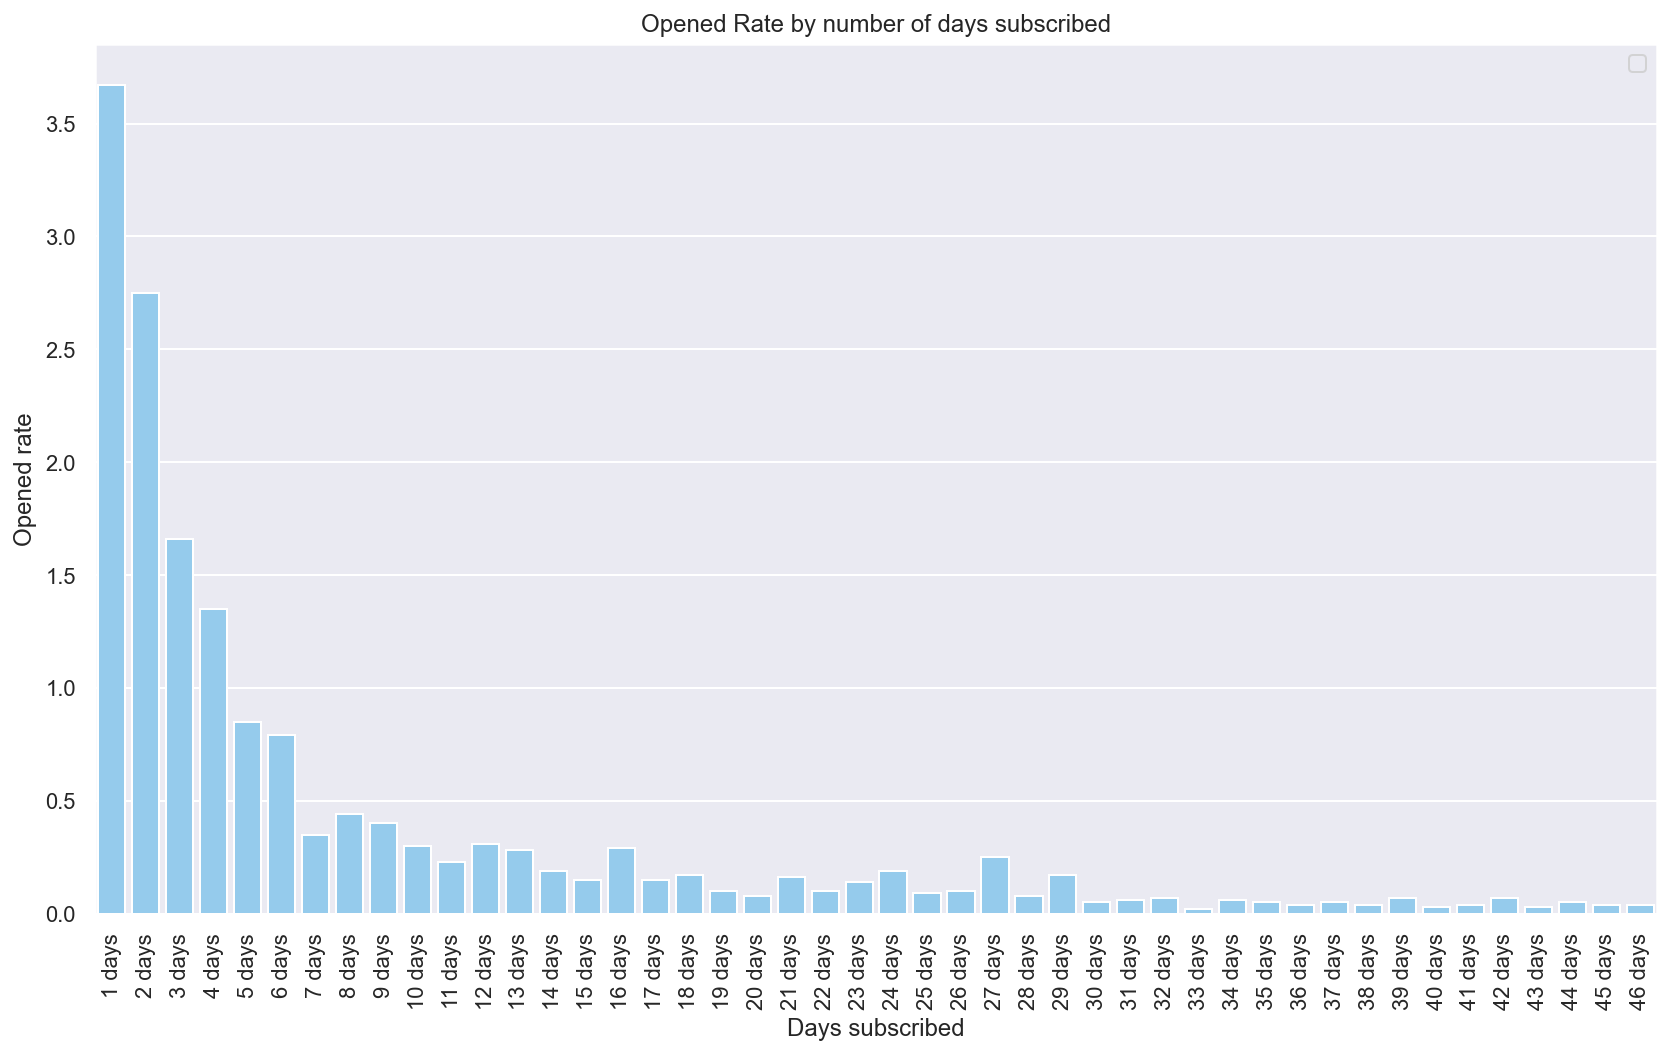

In [499]:
#Visualize the opened rate per days subscribed. 
set_sns_format(width=14, height=8);
plt.title('Opened Rate by number of days subscribed');
ax4 = sns.barplot(data=subscriber, x=subscriber.index, y='opened_rate', color='lightskyblue' );
ax4.set_ylabel('Opened rate');
ax4.set_xlabel('Days subscribed');
handles, labels = ax4.get_legend_handles_labels();
ax4.legend(handles, labels);

# Define the date format

ax4.set_xticklabels(subscriber.index.format(), rotation='vertical');

# Ensure a major tick for each week using (interval=1) 

plt.savefig('Opened_Rate_Subscriber_by_number_of_days_subscribed.png')
